# 0. Import Functions

In [30]:
import os
import shutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# https://realpython.com/pandas-python-explore-dataset/

In [39]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [5]:
print(os.getcwd())
os.chdir("C:/")
print(os.getcwd())


C:\
C:\


### **Renew API**

In [6]:
os.mkdir ("C:/Users/Pablo/.kaggle")

shutil.copy("C:\\Users\\pablo\\Downloads\\kaggle.json", "C:\\Users\\pablo\\.kaggle")

FileExistsError: [WinError 183] No se puede crear un archivo que ya existe: 'C:/Users/Pablo/.kaggle'

In [7]:
!kaggle datasets list -s "titanic"

ref                                                 title                                           size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
heptapod/titanic                                    Titanic                                         11KB  2017-05-16 08:14:22          27357        533  0.7058824        
azeembootwala/titanic                               Titanic                                         12KB  2017-06-05 12:14:37          10822        116  0.8235294        
brendan45774/test-file                              Titanic dataset                                 11KB  2021-07-08 17:04:21           6137        125  0.9705882        
rahulsah06/titanic                                  Titanic                                         34KB  2019-09-16 14:43:23           2064     

### **Download** it in our folder of interest and **unzip** it

In [22]:
print(os.getcwd())
os.mkdir ("C:/Datasets/Titanic")
os.chdir("C:/Datasets/Titanic") #Give permissions
print(os.getcwd())

!kaggle competitions download -c titanic


  0%|          | 0.00/34.1k [00:00<?, ?B/s]
100%|##########| 34.1k/34.1k [00:00<00:00, 34.6MB/s]


In [3]:
import zipfile
with zipfile.ZipFile("C:/Datasets/Titanic/titanic.zip", 'r') as zip_ref:
    zip_ref.extractall("C:/Datasets/Titanic")

# We chek is correctly unziped
os.listdir("C:/Datasets/Titanic/")

['gender_submission.csv', 'test.csv', 'titanic.zip', 'train.csv']

### **Load** data

In [69]:
import pandas as pd

train = pd.read_csv (r"C:/Datasets/Titanic/train.csv")
test = pd.read_csv (r"C:/Datasets/Titanic/test.csv")

# 1. Exploratory Analysis

 - **Calculate** metrics about your data
 - **Perform** basic queries and aggregations
 - **Discover** and handle incorrect data, inconsistencies, and missing values
 - **Visualize** your data with plots



In [9]:
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [32]:
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [14]:
train["Fare"].value_counts()


8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: Fare, Length: 248, dtype: int64

### Seaborn heatmaps

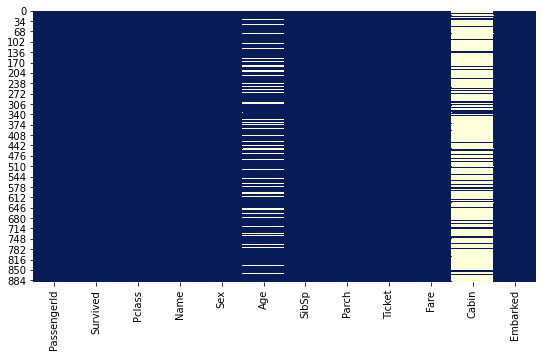

In [33]:
fig, ax = plt.subplots(figsize=(9,5))
sns.heatmap(train.isnull(), cbar=False, cmap="YlGnBu_r")
plt.show()

### Seaborn Countplots

for all categorical columns

In [36]:
cols = ['Survived', 'Sex', 'Pclass', 'SibSp', 'Parch', 'Embarked']

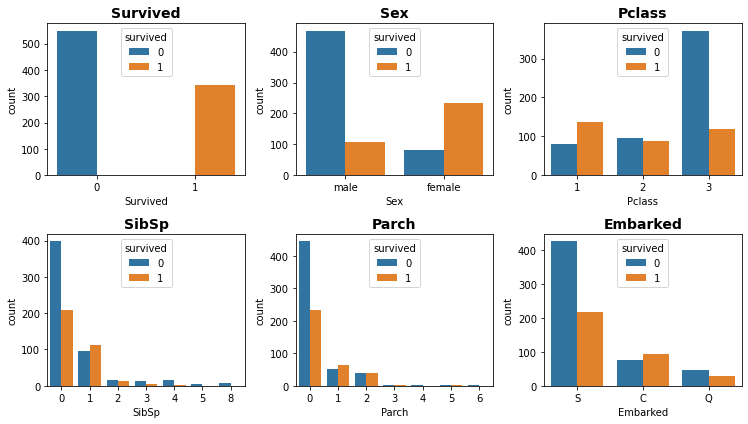

In [40]:
nr_rows = 2
nr_cols = 3

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*3.5,nr_rows*3))

for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        
        i = r*nr_cols+c       
        ax = axs[r][c]
        sns.countplot(train[cols[i]], hue=train["Survived"], ax=ax)
        ax.set_title(cols[i], fontsize=14, fontweight='bold')
        ax.legend(title="survived", loc='upper center') 
        
plt.tight_layout()  

### Seaborn Distplots

Distribution of Age as function of Pclass, Sex and Survived


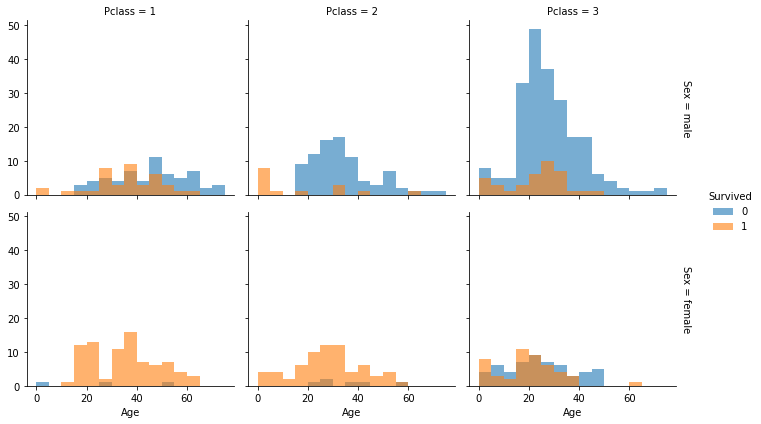

In [41]:
bins = np.arange(0, 80, 5)
g = sns.FacetGrid(train, row='Sex', col='Pclass', hue='Survived', margin_titles=True, size=3, aspect=1.1)
g.map(sns.distplot, 'Age', kde=False, bins=bins, hist_kws=dict(alpha=0.6))
g.add_legend()  
plt.show()

### Bar and Box plots

Default mode for seaborn barplots is to plot the mean value for the category.    
Also, the standard deviation is indicated.  
So, if we choose Survived as y-value, we get a plot of the survival rate as function  
of the categories present in the feature chosen as x-value.  


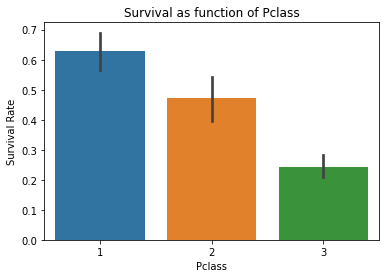

In [43]:
sns.barplot(x='Pclass', y='Survived', data=train)
plt.ylabel("Survival Rate")
plt.title("Survival as function of Pclass")
plt.show()

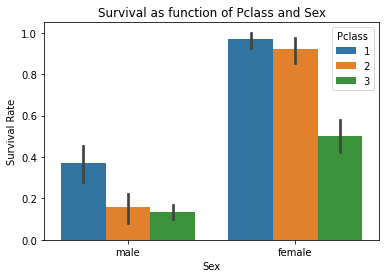

In [44]:
sns.barplot(x='Sex', y='Survived', hue='Pclass', data=train)
plt.ylabel("Survival Rate")
plt.title("Survival as function of Pclass and Sex")
plt.show()

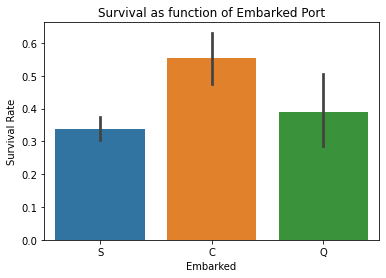

In [45]:
sns.barplot(x='Embarked', y='Survived', data=train)
plt.ylabel("Survival Rate")
plt.title("Survival as function of Embarked Port")
plt.show()

Passengers embarked in "S" had the lowest survival rate, those embarked in "C" the highest.    
Again, with hue we see the survival rate as function of Embarked and Pclass.

### Boxplot


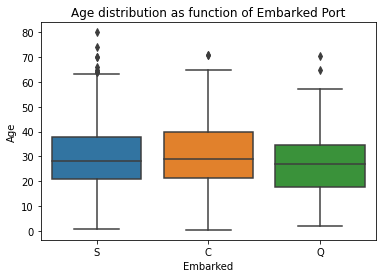

In [46]:
sns.boxplot(x='Embarked', y='Age', data=train)
plt.title("Age distribution as function of Embarked Port")
plt.show()

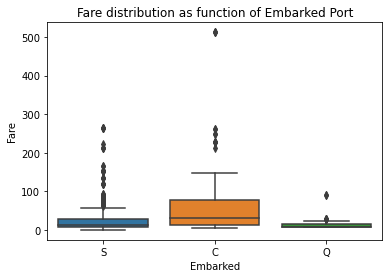

In [47]:
sns.boxplot(x='Embarked', y='Fare', data=train)
plt.title("Fare distribution as function of Embarked Port")
plt.show()

### Swarm and Violin plots





Although the following swarm and violin plots show the same data like the countplots or distplots before,   
they can reveal ceratin details that disappear in other plots. However, it takes more time to study these plots in detail.



In [48]:
cm_surv = ["darkgrey" , "lightgreen"]

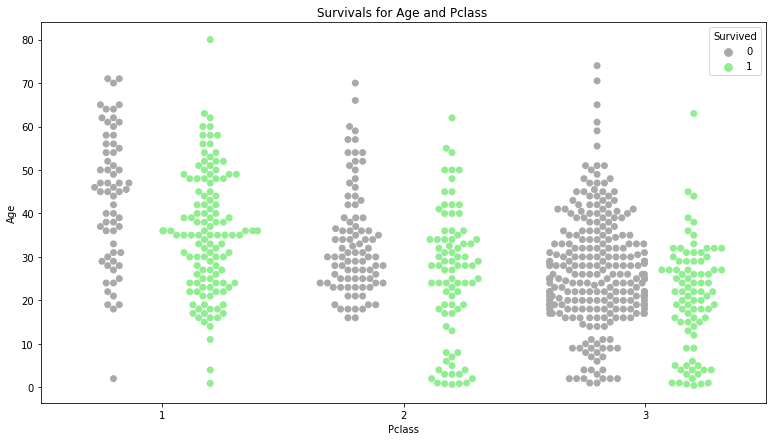

In [67]:
fig, ax = plt.subplots(figsize=(13,7))
sns.swarmplot(x='Pclass', y='Age', hue='Survived', split=True, data=train , palette=cm_surv, size=7, ax=ax)
plt.title('Survivals for Age and Pclass ')
plt.show()

Here, the high survival rate for kids in Pclass 2 is easily observed.   
Also, it becomes more obvious that for passengers older than 40 the best chance to survive is in Pclass 1,   
and smallest chance in Pclass 3  


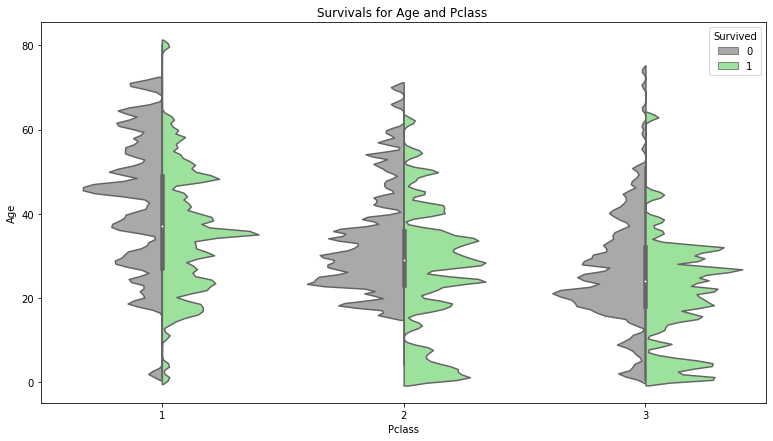

In [62]:
fig, ax = plt.subplots(figsize=(13,7))
sns.violinplot(x="Pclass", y="Age", hue='Survived', data=train, split=True, bw=0.05 , palette=cm_surv, ax=ax)
plt.title('Survivals for Age and Pclass ')
plt.show()

This violinplot shows exactly the same info like the swarmplot before.

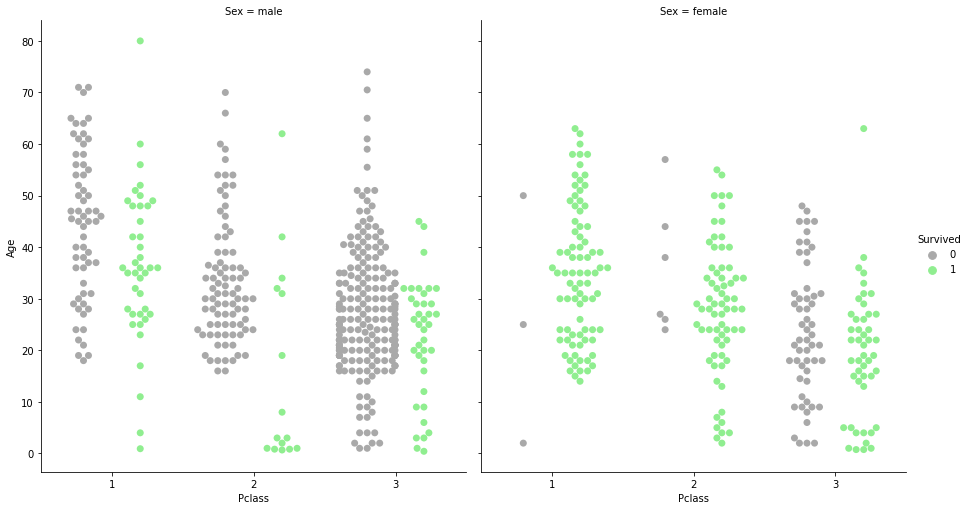

In [64]:
g = sns.factorplot(x="Pclass", y="Age", hue="Survived", col="Sex", data=train, kind="swarm", split=True, palette=cm_surv, size=7, aspect=.9, s=7)

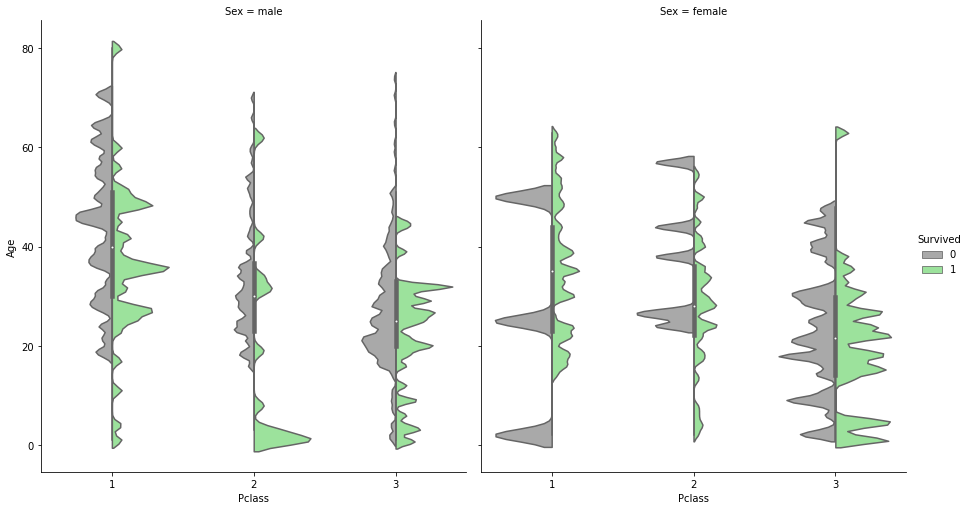

In [68]:


g = sns.factorplot(x="Pclass", y="Age", hue="Survived", col="Sex", data=train, kind="violin", split=True, bw=0.05, palette=cm_surv, size=7, aspect=.9, s=7)



# 2. Data Wrangling and Feature Engineering

### Feature Engineering

**New Features: 'FamilySize' , 'Alone' , 'NameLen' and 'Title'**


In [70]:
for df in [train, test] :
    
    df['FamilySize'] = df['SibSp'] + df['Parch'] +1
    
    df['Alone']=0
    df.loc[(df.FamilySize==1),'Alone'] = 1
    
    df['NameLen'] = df.Name.apply(lambda x : len(x)) 
    df['NameLenBin']=np.nan
    for i in range(20,0,-1):
        df.loc[ df['NameLen'] <= i*5, 'NameLenBin'] = i
    
    
    df['Title']=0
    df['Title']=df.Name.str.extract(r'([A-Za-z]+)\.') #lets extract the Salutations
    df['Title'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                    ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

**New Feature: NameLenBin**

In [71]:
print(train[['NameLen' , 'NameLenBin']].head(10))

   NameLen  NameLenBin
0       23         5.0
1       51        11.0
2       22         5.0
3       44         9.0
4       24         5.0
5       16         4.0
6       23         5.0
7       30         6.0
8       49        10.0
9       35         7.0


In [72]:
grps_namelenbin_survrate = train.groupby(['NameLenBin'])['Survived'].mean().to_frame()
grps_namelenbin_survrate

,Survived
NameLenBin,
3.0,0.227273
4.0,0.230769
5.0,0.325581
6.0,0.364929
7.0,0.522727
8.0,0.477273
9.0,0.800000
10.0,0.800000
11.0,0.812500


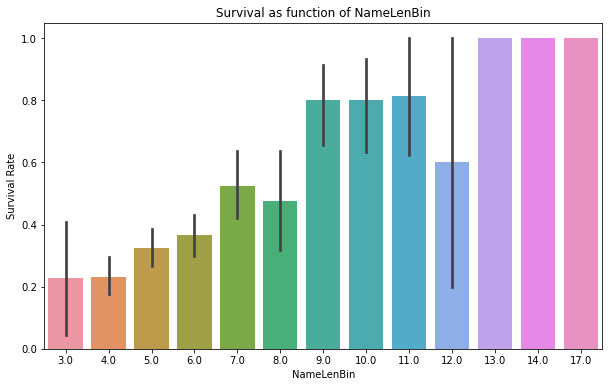

In [73]:
plt.subplots(figsize=(10,6))
sns.barplot(x='NameLenBin' , y='Survived' , data = train)
plt.ylabel("Survival Rate")
plt.title("Survival as function of NameLenBin")
plt.show()


**Looks like there is very strong correlation of Survival rate and Name length**

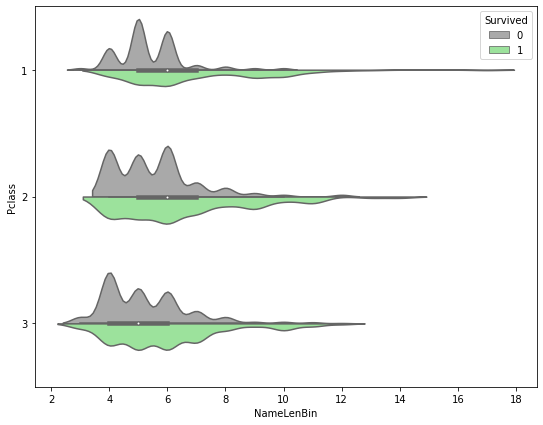

In [74]:
fig, ax = plt.subplots(figsize=(9,7))
sns.violinplot(x="NameLenBin", y="Pclass", data=train, hue='Survived', split=True, 
               orient="h", bw=0.2 , palette=cm_surv, ax=ax)
plt.show()

**Chance to survive increases with length of name for all Passenger classes**


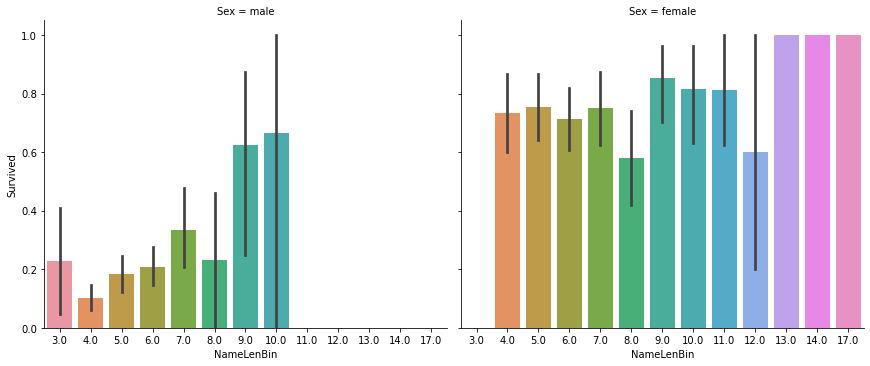

In [75]:
g = sns.factorplot(x="NameLenBin", y="Survived", col="Sex", data=train, kind="bar", size=5, aspect=1.2)

**New Feature: Title**

In [76]:
grps_title_survrate = train.groupby(['Title'])['Survived'].mean().to_frame()
grps_title_survrate

,Survived
Title,
Master,0.575000
Miss,0.704301
Mr,0.162571
Mrs,0.795276
Other,0.111111


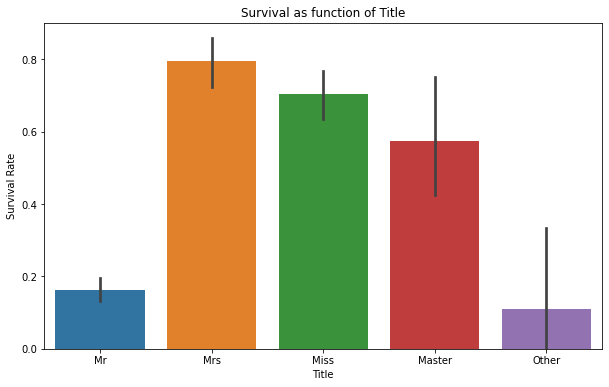

In [77]:
plt.subplots(figsize=(10,6))
sns.barplot(x='Title' , y='Survived' , data = train)
plt.ylabel("Survival Rate")
plt.title("Survival as function of Title")
plt.show()

**New Feature: Family size**

In [83]:
pd.crosstab(train.FamilySize,train.Survived).apply(lambda r: r/r.sum(), axis=1).style.background_gradient(cmap='summer_r')

Survived,0,1
FamilySize,,
1,0.696462,0.303538
2,0.447205,0.552795
3,0.421569,0.578431
4,0.275862,0.724138
5,0.800000,0.200000
6,0.863636,0.136364
7,0.666667,0.333333
8,1.000000,0.000000
11,1.000000,0.000000


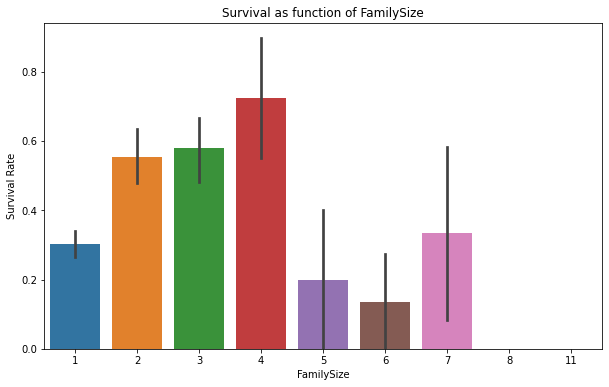

In [84]:
plt.subplots(figsize=(10,6))
sns.barplot(x='FamilySize' , y='Survived' , data = train)
plt.ylabel("Survival Rate")
plt.title("Survival as function of FamilySize")
plt.show()

## Data Wrangling

**Fill NaN with mean or mode**


In [90]:
for df in [train, test]:

    # Title
    df['Title'] = df['Title'].fillna(df['Title'].mode().iloc[0])

    # Age: use Title to fill missing values
    df.loc[(df.Age.isnull())&(df.Title=='Mr'),'Age']= df.Age[df.Title=="Mr"].mean()
    df.loc[(df.Age.isnull())&(df.Title=='Mrs'),'Age']= df.Age[df.Title=="Mrs"].mean()
    df.loc[(df.Age.isnull())&(df.Title=='Master'),'Age']= df.Age[df.Title=="Master"].mean()
    df.loc[(df.Age.isnull())&(df.Title=='Miss'),'Age']= df.Age[df.Title=="Miss"].mean()
    df.loc[(df.Age.isnull())&(df.Title=='Other'),'Age']= df.Age[df.Title=="Other"].mean()
    df = df.drop('Name', axis=1)

In [92]:
# Embarked
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode().iloc[0])
test['Embarked'] = test['Embarked'].fillna(test['Embarked'].mode().iloc[0])

# Fare
train['Fare'] = train['Fare'].fillna(train['Fare'].mean())
test['Fare'] = test['Fare'].fillna(test['Fare'].mean())

**Bining for Age and Fare, convert Title to numerical**

In [93]:
for df in [train, test]:
    
    df['Age_bin']=np.nan
    for i in range(8,0,-1):
        df.loc[ df['Age'] <= i*10, 'Age_bin'] = i
        
    df['Fare_bin']=np.nan
    for i in range(12,0,-1):
        df.loc[ df['Fare'] <= i*50, 'Fare_bin'] = i        
    
    # convert Title to numerical
    df['Title'] = df['Title'].map( {'Other':0, 'Mr': 1, 'Master':2, 'Miss': 3, 'Mrs': 4 } )
    # fill na with maximum frequency mode
    df['Title'] = df['Title'].fillna(df['Title'].mode().iloc[0])
    df['Title'] = df['Title'].astype(int)     

In [94]:
train_ml = train.copy()
test_ml = test.copy()

passenger_id = test_ml['PassengerId']

In [95]:
train_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
 12  FamilySize   891 non-null    int64  
 13  Alone        891 non-null    int64  
 14  NameLen      891 non-null    int64  
 15  NameLenBin   891 non-null    float64
 16  Title        891 non-null    int32  
 17  Age_bin      891 non-null    float64
 18  Fare_bin     891 non-null    float64
dtypes: float

In [96]:
test_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  FamilySize   418 non-null    int64  
 12  Alone        418 non-null    int64  
 13  NameLen      418 non-null    int64  
 14  NameLenBin   418 non-null    float64
 15  Title        418 non-null    int32  
 16  Age_bin      418 non-null    float64
 17  Fare_bin     418 non-null    float64
dtypes: float64(5), int32(1), int64(7), object(5)
memor

**convert categorical to numerical : get_dummies**


In [97]:
train_ml = pd.get_dummies(train_ml, columns=['Sex', 'Embarked', 'Pclass'], drop_first=True)
test_ml = pd.get_dummies(test_ml, columns=['Sex', 'Embarked', 'Pclass'], drop_first=True)

train_ml.drop(['PassengerId','Name','Ticket', 'Cabin', 'Age', 'Fare_bin'],axis=1,inplace=True)
test_ml.drop(['PassengerId','Name','Ticket', 'Cabin', 'Age', 'Fare_bin'],axis=1,inplace=True)

#df_train_ml.drop(['PassengerId','Name','Ticket', 'Cabin', 'Age_bin', 'Fare_bin'],axis=1,inplace=True)
#df_test_ml.drop(['PassengerId','Name','Ticket', 'Cabin', 'Age_bin', 'Fare_bin'],axis=1,inplace=True)

In [98]:
train_ml.dropna(inplace=True)

In [99]:
for df in [train_ml, test_ml]:
    df.drop(['NameLen'], axis=1, inplace=True)

    df.drop(['SibSp'], axis=1, inplace=True)
    df.drop(['Parch'], axis=1, inplace=True)
    df.drop(['Alone'], axis=1, inplace=True)

In [100]:
train_ml.head()

,Survived,Fare,FamilySize,NameLenBin,Title,Age_bin,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,0,7.2500,2,5.0,1,3.0,1,0,1,0,1
1,1,71.2833,2,11.0,4,4.0,0,0,0,0,0
2,1,7.9250,1,5.0,3,3.0,0,0,1,0,1
3,1,53.1000,2,9.0,4,4.0,0,0,1,0,0
4,0,8.0500,1,5.0,1,4.0,1,0,1,0,1


In [102]:
test_ml.fillna(test_ml.mean(), inplace=True)
test_ml.head()

,Fare,FamilySize,NameLenBin,Title,Age_bin,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,7.8292,1,4.0,1,4.0,1,1,0,0,1
1,7.0000,2,7.0,4,5.0,0,0,1,0,1
2,9.6875,1,5.0,1,7.0,1,1,0,1,0
3,8.6625,1,4.0,1,3.0,1,0,1,0,1
4,12.2875,3,9.0,4,3.0,0,0,1,0,1


**Standard Scaler**